# ANALISIS DE INGRESOS

1. IMPORTE DE LIBRERIAS

In [ ]:
import pandas as pd


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

2. CARGA DE DATA

In [ ]:
df_train=pd.read_csv('train_adultos.csv',sep=',')

In [ ]:
df_train

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df_train.shape

(32561, 15)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work-class      30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df_train.columns

Index(['age', 'work-class', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df_train.head(3)

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [ ]:
df_train['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
#Decodificacion de valores a 0 y 1 para income tipo integral
df_train['income']=df_train['income'].replace({'<=50K':0})
df_train['income']=df_train['income'].replace({'>50K':1})
df_train['income']=df_train['income'].astype(int)


<ipython-input-16-1165266f30ba>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['income']=df_train['income'].replace({'>50K':1})


In [ ]:
df_train['income']

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [ ]:
# drop borrando columna  fnlwgt
df_train.drop(['fnlwgt'],axis=1,inplace=True)

In [ ]:
df_train.head(3)

,age,work-class,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


In [ ]:
# Entendimientos de datos
#verificacion de valores null
df_train.info()
df_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work-class      30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income          32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


,0
age,0
work-class,1836
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0
capital-gain,0


In [ ]:
#si hay valores null entonces deben tratarse
!pip install missingno --upgrade

In [ ]:
import missingno as msno


<Axes: >

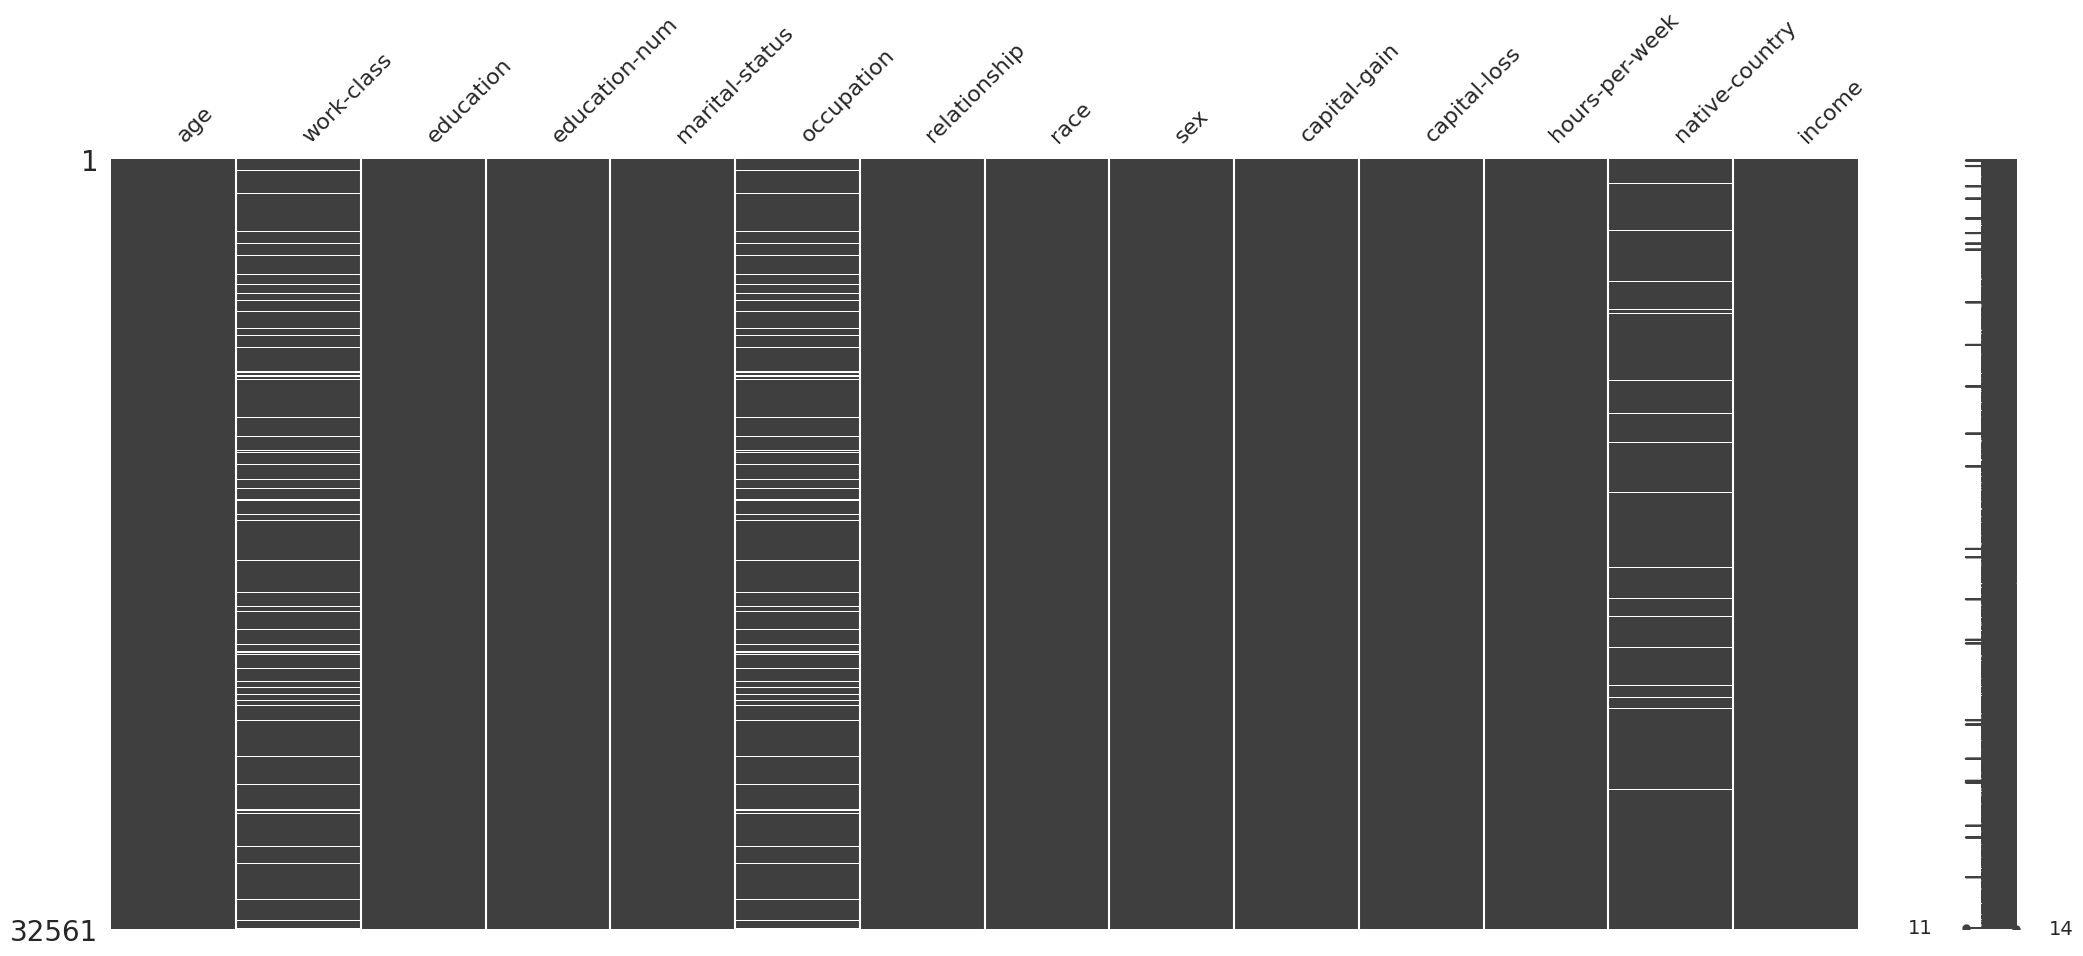

In [ ]:
#verificar los null por conjuntos
msno.matrix(df_train)

,count
income,
0,24720
1,7841


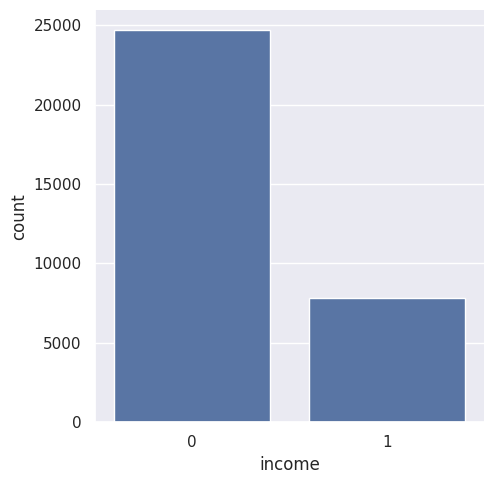

In [ ]:
#sns.catplot para grafico de funcion de ejes, x eje incomes, y eje contar
# de la data=df
sns.catplot(x='income',kind='count',data=df_train)
#contar tipo tabla
df_train['income'].value_counts()

In [ ]:
### VARIBLES CUANTITATIVAS
  ## medidas estadisticas
df_train.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
# se observan valores atipicos o outliners
# en columas 'age','capital-gain','capital-loss',hours-per-week

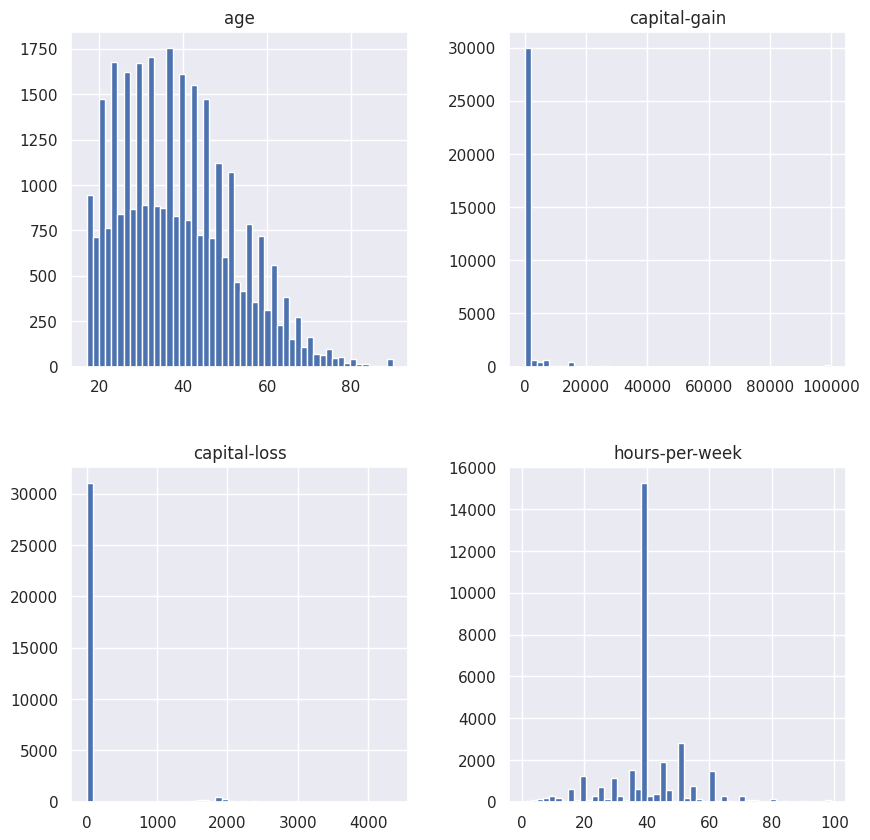

In [ ]:
variable_atipicos=['age','capital-gain','capital-loss','hours-per-week']
df_train[variable_atipicos].hist(figsize=(10,10),bins=50)
plt.show()

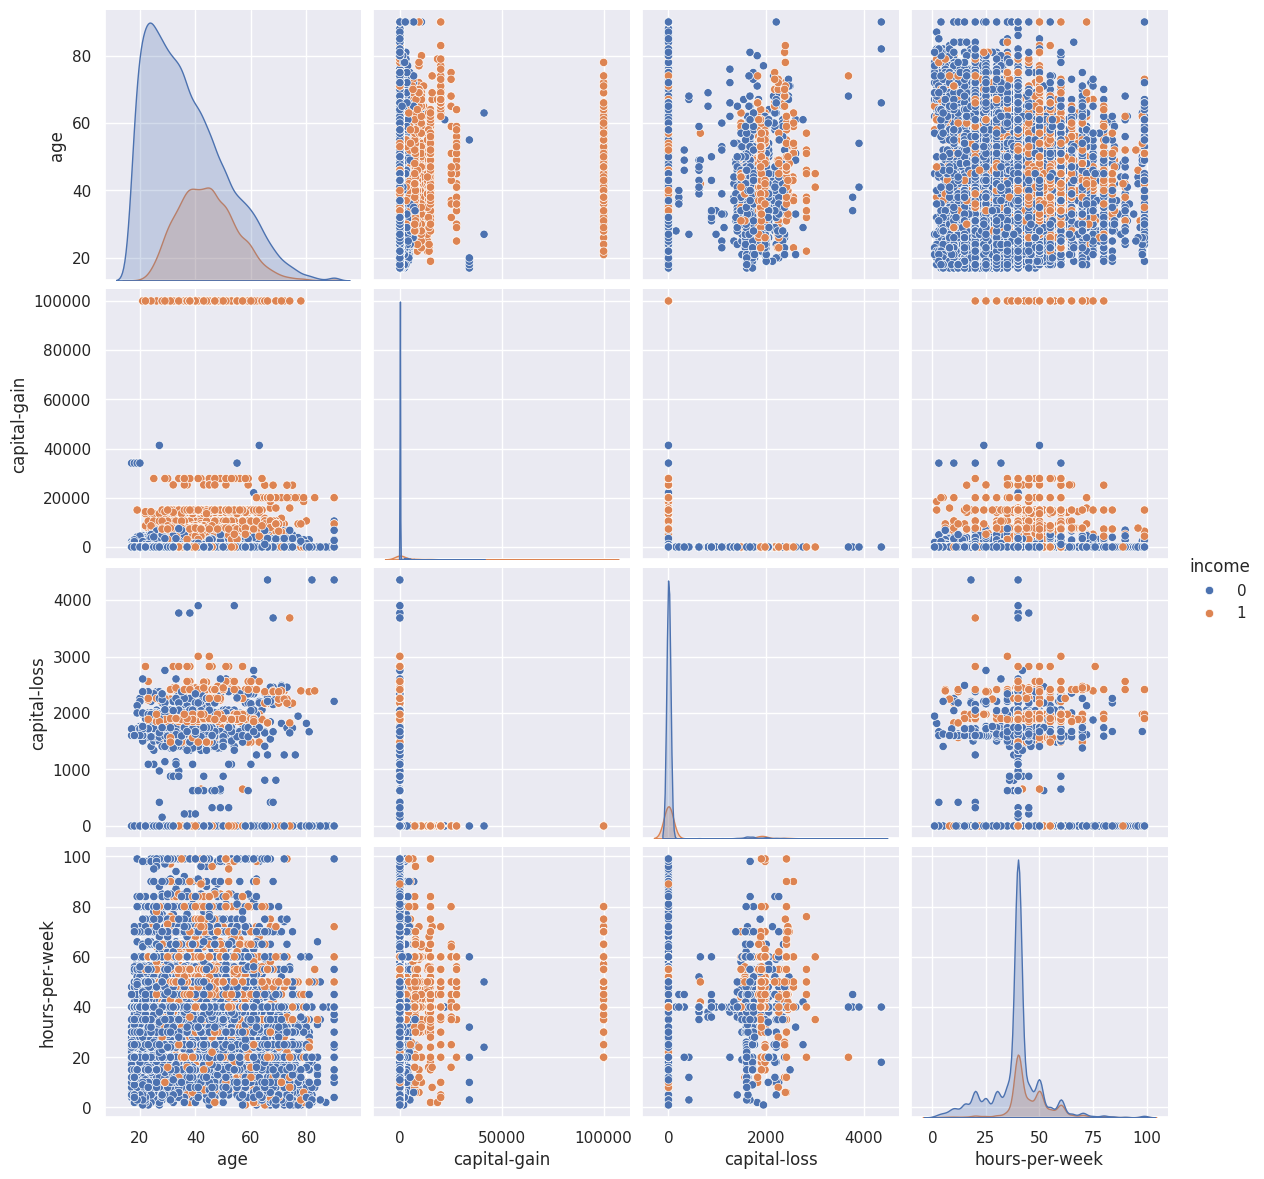

In [ ]:
#grafico de pairplot diagrama de pares
#visualización de la relación entre cada par de variables en un conjunto de datos
#histomgrama y dispersion
variable_atipicos_2=['age','capital-gain','capital-loss','hours-per-week','income']
sns.pairplot(df_train[variable_atipicos_2],height=3,diag_kind='kde',hue='income')
plt.show()

In [ ]:
#Correlaciones

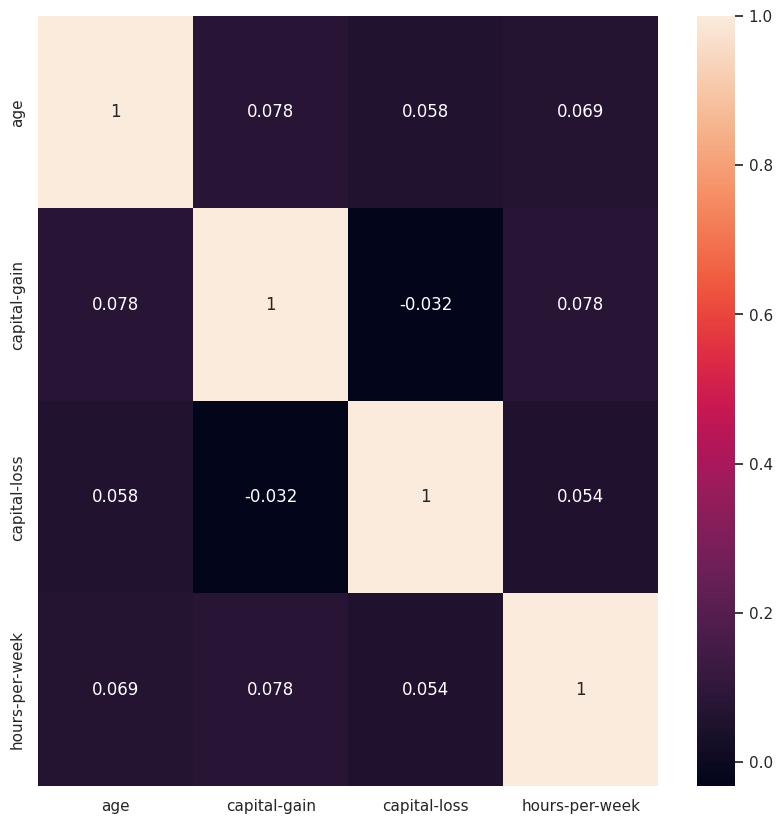

In [ ]:
#graficos de correlacione mapa de calor
corr=df_train[['age','capital-gain','capital-loss','hours-per-week']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
###VARIBLES CUILITATIVAS

In [ ]:
# los atributos de df solo incluyan objetos
categorical_atributos=df_train.select_dtypes(include=['object'])


In [ ]:
#
categorical_atributos.dtypes

,0
work-class,object
education,object
marital-status,object
occupation,object
relationship,object
race,object
sex,object
native-country,object


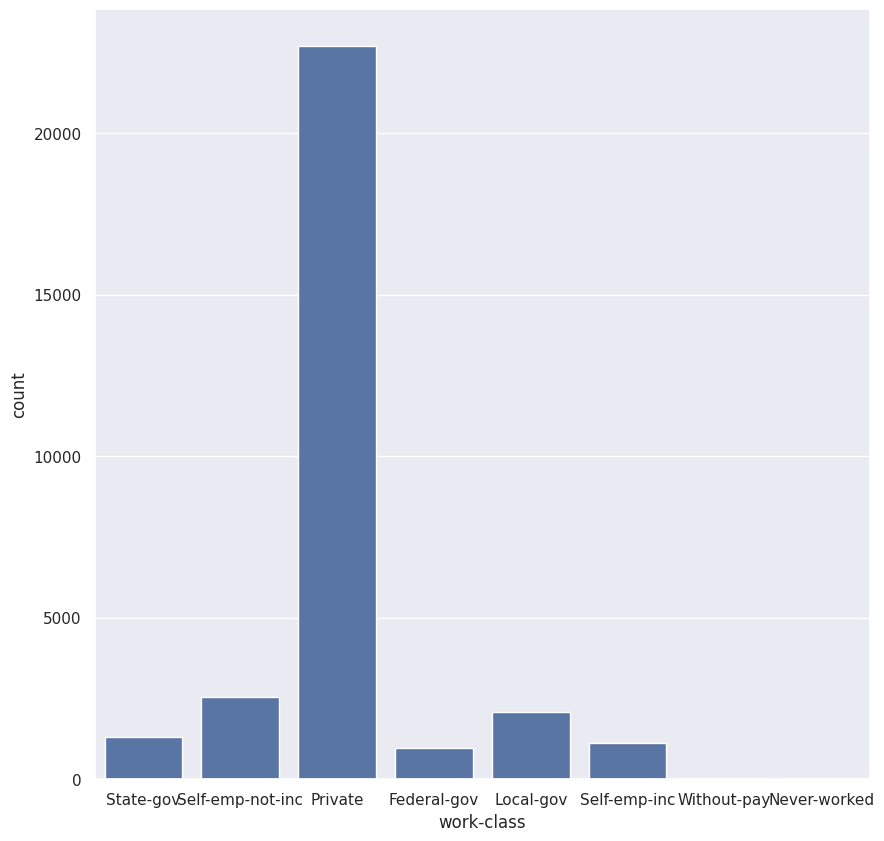

,proportion
work-class,
Federal-gov,0.031245
Local-gov,0.068120
Never-worked,0.000228
Private,0.738682
Self-emp-inc,0.036322
Self-emp-not-inc,0.082701
State-gov,0.042246
Without-pay,0.000456


In [ ]:
### WORK CLASS TIPO DE TRABAJO
plt.figure(figsize=(10,10))
sns.countplot(x='work-class',data=categorical_atributos)
plt.show()
df_train['work-class'].value_counts(1).sort_index()

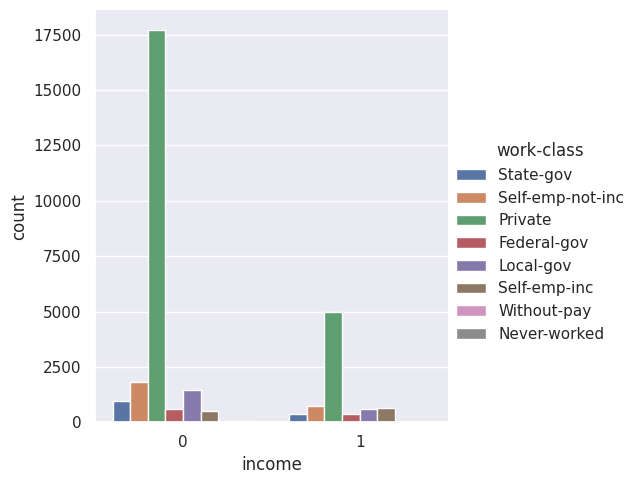

work-class income                
                     count      mean   sum
0       Federal-gov    960  0.386458   371
1         Local-gov   2093  0.294792   617
2      Never-worked      7  0.000000     0
3           Private  22696  0.218673  4963
4      Self-emp-inc   1116  0.557348   622
5  Self-emp-not-inc   2541  0.284927   724
6         State-gov   1298  0.271957   353
7       Without-pay     14  0.000000     0

In [ ]:
# private abarca un 74%
sns.catplot
#otro grafico
sns.catplot(x='income',kind='count',hue='work-class',data=df_train)
plt.show()
# define variables y agrupa segun si cuenta, media y suma
df_train[['work-class','income']].groupby(['work-class'], as_index=False).agg(['count','mean','sum'])

In [ ]:
# los segmentos work class con mayor salario son los privados y self emp inc

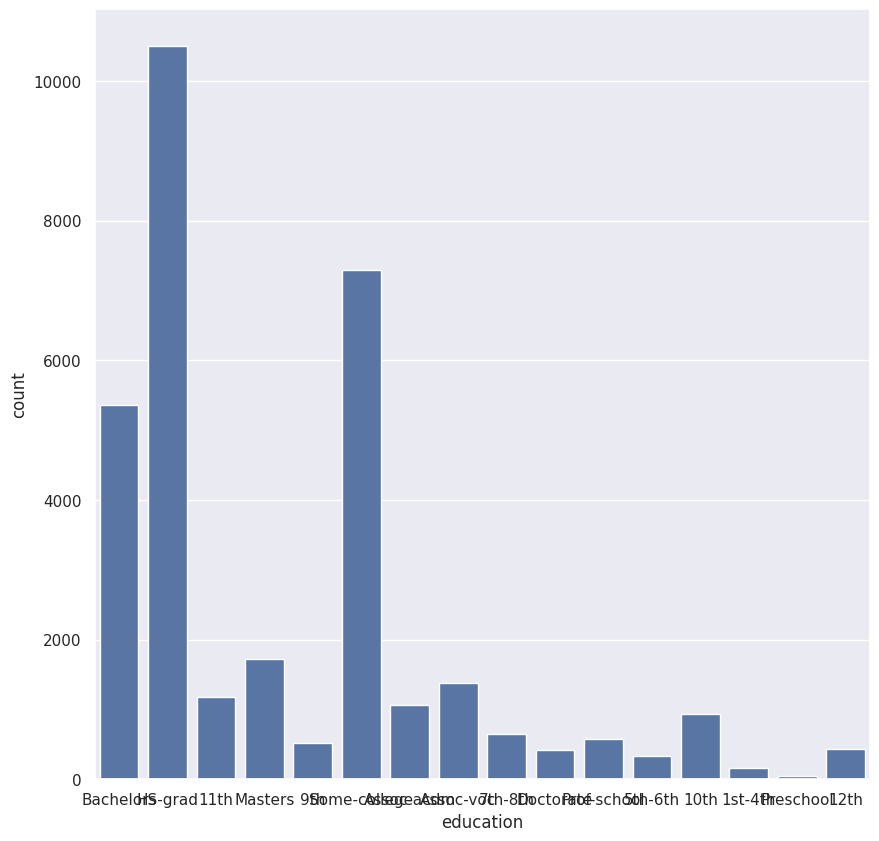

,proportion
education,
10th,0.028654
11th,0.036086
12th,0.013298
1st-4th,0.005160
5th-6th,0.010227
7th-8th,0.019840
9th,0.015786
Assoc-acdm,0.032769
Assoc-voc,0.042443


In [ ]:
### RELACION DE EDUCACION
plt.figure(figsize=(10,10))
sns.countplot(x='education',data=categorical_atributos)
plt.show()
df_train['education'].value_counts(1).sort_index()

In [ ]:
# HS grad tienn 32% mas ingresos

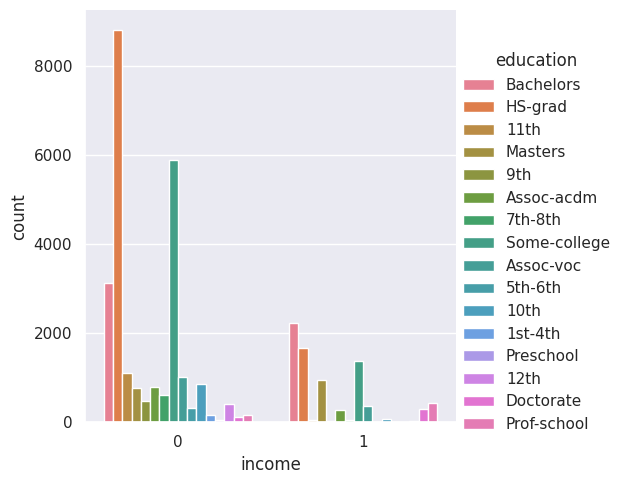

education income                
                  count      mean   sum
0           10th    933  0.066452    62
1           11th   1175  0.051064    60
2           12th    433  0.076212    33
3        1st-4th    168  0.035714     6
4        5th-6th    333  0.048048    16
5        7th-8th    646  0.061920    40
6            9th    514  0.052529    27
7     Assoc-acdm   1067  0.248360   265
8      Assoc-voc   1382  0.261216   361
9      Bachelors   5355  0.414753  2221
10     Doctorate    413  0.740920   306
11       HS-grad  10501  0.159509  1675
12       Masters   1723  0.556587   959
13     Preschool     51  0.000000     0
14   Prof-school    576  0.734375   423
15  Some-college   7291  0.190235  1387

In [ ]:
sns.catplot(x='income',kind='count',hue='education',data=df_train)
plt.show()
df_train[['education','income']].groupby(['education'], as_index=False).agg(['count','mean','sum'])


In [ ]:
# doctorado masters y prof school tiene mas ingresos

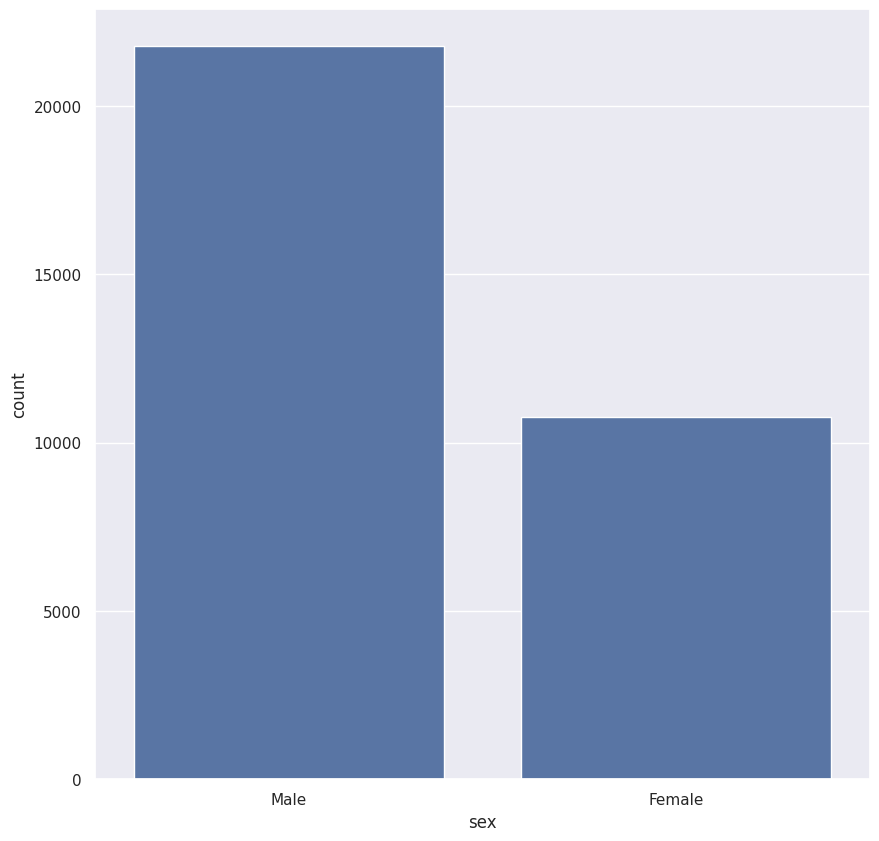

,proportion
sex,
Female,0.330795
Male,0.669205


In [ ]:
##genero  sex
plt.figure(figsize=(10,10))
sns.countplot(x='sex',data=categorical_atributos)
plt.show()
df_train['sex'].value_counts(1).sort_index()

In [ ]:
# el genero masculino cuenta con un 67%

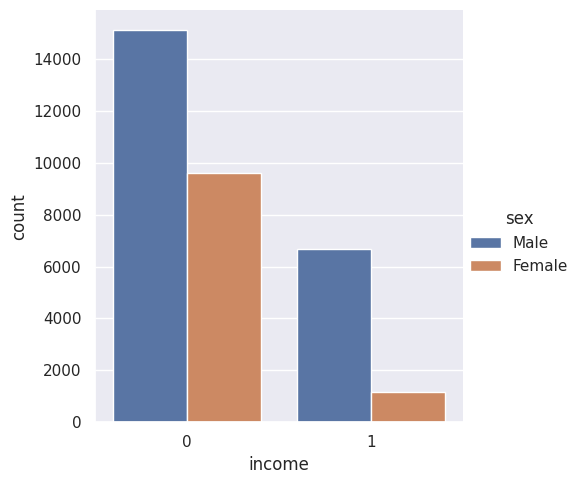

sex income                
           count      mean   sum
0  Female  10771  0.109461  1179
1    Male  21790  0.305737  6662

In [ ]:
sns.catplot(x='income',kind='count',hue='sex',data=df_train)
plt.show()
df_train[['sex','income']].groupby(['sex'], as_index=False).agg(['count','mean','sum'])

In [ ]:
#el genero masculino tiene un 30% mas de salarios >50K